In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# divide the dataset into class and target variable
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values



In [4]:
X

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [5]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

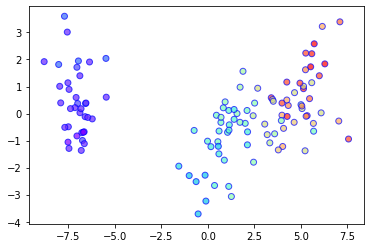

In [8]:
plt.scatter(
X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
alpha=0.7,edgecolors='b')



In [9]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [10]:
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.23333333333333334
[[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]
